# <center> TASK - 6: Prediction using Decision Tree Algorithm </center>

#### By Gyanada Sharma

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Splitting the data:

In [7]:
x = df.drop('target', axis=1)
y = df['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Fitting the Model:

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(x,y)

DecisionTreeClassifier()

Checking for accuracy:

In [11]:
y_pred = dt.predict(x_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Visualizing the tree:

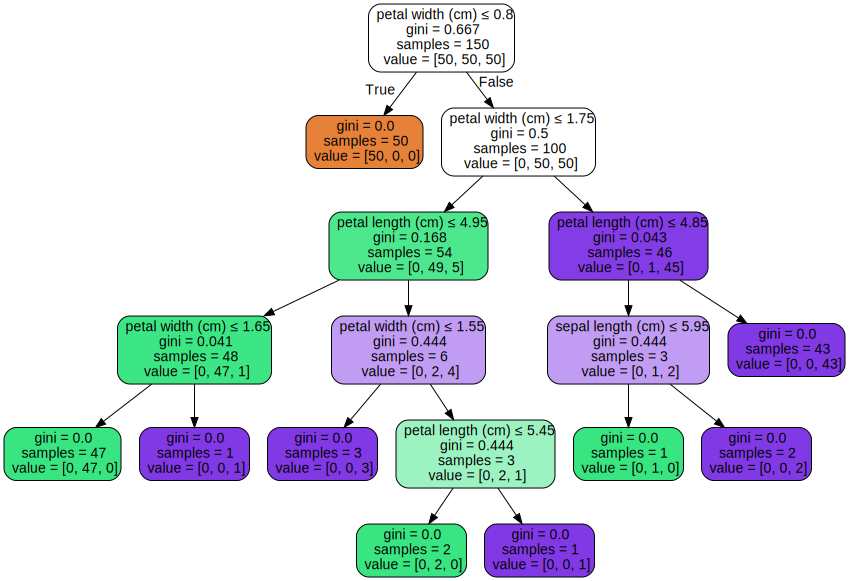

In [14]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=iris.feature_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

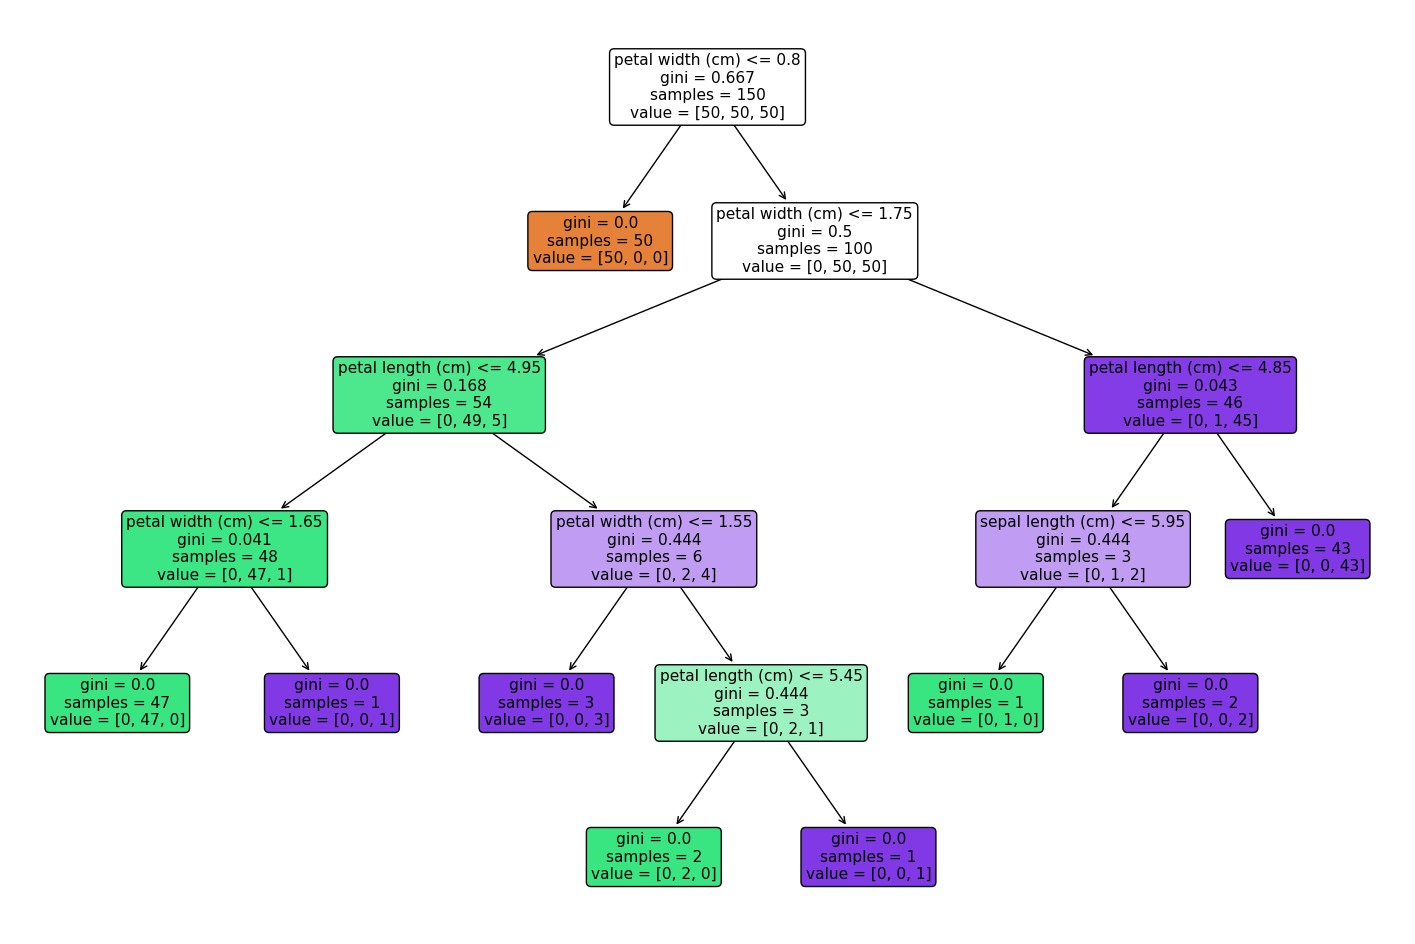

In [15]:
plt.figure(figsize=(18,12))
tree.plot_tree(dt, feature_names=iris.feature_names, filled=True, rounded=True)
plt.show()